In [3]:
# -*- coding: utf-8 -*-
import wave
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pylab as pl


framerate = 44100
# 文件的大小应该为1.68mb
time = 10
f = [220,246.9,261.6,293.6,329.6,349.2,391.9,415.3,440,493.8]
tt = np.arange(0, 0.5, 1.0/framerate)
wa=[]
for i in range(10): 
    wave_data = signal.chirp(tt,f[i],time, f[i], method='linear') * 10000
    wave_data = wave_data.astype(np.short)
    wa = np.concatenate((wa,wave_data),axis=0)
# 打开WAV文档
f = wave.open(r"noisy.wav", "wb")
# 配置声道数、量化位数和取样频率
f.setnchannels(2)
f.setsampwidth(2)
f.setframerate(framerate)
# 将wav_data转换为二进制数据写入文件
f.writeframes(wa.tostring())
f.close()

2 2 44100 441000


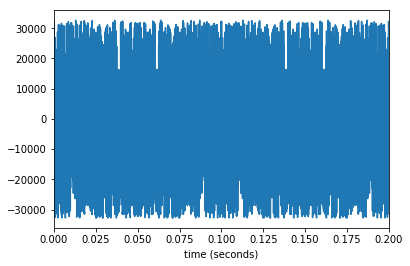

In [4]:
# 打开WAV文档
f = wave.open("noisy.wav", "rb")

# 读取格式信息
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
print(nchannels,sampwidth,framerate,nframes)

# 读取波形数据
str_data = f.readframes(nframes)
f.close()

#将波形数据转换为数组
wave_data = np.frombuffer(str_data, dtype=np.short)
wave_data.shape = -1, 2
time = np.arange(0, nframes) * (1.0 / framerate)

# 绘制波形
pl.plot(time, wave_data[:,0])
pl.xlabel("time (seconds)")
plt.xlim(0,0.2)
pl.show()